<a href="https://colab.research.google.com/github/Saha555339/MTOIAW/blob/main/%D0%9C%D0%A2%D0%9E%D0%98%D0%90%D0%A0_%D1%81%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install dostoevsky
!python -m dostoevsky download fasttext-social-network-model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4393377 sha256=7abd4aac38aa649f5ac633de221ed6835515706a1c0e2e9202d637254f0841fb
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [68]:
!pip install rusenttokenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
import threading
from dostoevsky.tokenization import RegexTokenizer
from dostoevsky.models import FastTextSocialNetworkModel
from rusenttokenize import ru_sent_tokenize

tokenizer = RegexTokenizer()
model = FastTextSocialNetworkModel(tokenizer=tokenizer)

In [125]:
class Analyzer:
  def __init__(self, file_path):
    self.file_path = file_path
    self.sentences = []
    self.polarity_sentences = []
  
  def __read_lines(self):
    with open(self.file_path, 'r') as f:
      for line in f:
        line = f.readline()
        # self.sentences.extend(sent_tokenize(line))
        self.sentences.extend(ru_sent_tokenize(line))
  
  def __polarity(self):
    score = model.predict(self.sentences, k=2)

    for sentence, sentiment in zip(self.sentences, score):
      if sentence != '':
        neutral = sentiment.get('neutral')
        positive = sentiment.get('positive')
        negative = sentiment.get('negative')
        polarity = 0

        if neutral is None:
          neutral = 0
        if positive is None:
          positive = 0
          polarity = -negative
        if negative is None:
          negative = 0
          polarity = positive
        


          
        dsentence = {'sentence':sentence, 'neutral': round(neutral, 3), 'positive': round(positive, 3), 'negative': round(negative, 3), 'polarity': polarity}
        self.polarity_sentences.append(dsentence)
  
  def run(self):
    self.__read_lines()
    self.__polarity()


In [126]:
analyzer1 = Analyzer("/content/text1.TXT")
analyzer2 = Analyzer("/content/text2.TXT")

thr1 = threading.Thread(target=analyzer1.run())
thr2 = threading.Thread(target=analyzer2.run())

thr1.start()
thr2.start()
thr1.join()
thr2.join()

all_dsentences = []
all_dsentences.extend(analyzer1.polarity_sentences)
all_dsentences.extend(analyzer2.polarity_sentences)
#all_dsentences = sorted(all_dsentences, key=lambda d: d['polarity'])

In [127]:
import pandas as pd

df = pd.DataFrame.from_dict(all_dsentences)
df

,sentence,neutral,positive,negative,polarity
0,Это вызывает серьезное международное напряжение.,0.930,0.000,0.148,-0.148057
1,Яркий тому пример – ситуация с иранской ядерно...,0.995,0.000,0.030,-0.030225
2,Если международное сообщество не выработает ра...,0.665,0.000,0.275,-0.275140
3,Мы будем постоянно сталкиваться с угрозой расп...,0.578,0.000,0.500,-0.500010
4,С российским предложением созвучны и последние...,0.788,0.000,0.239,-0.239359
5,"Считаю, что Россия и США объективно и в одинак...",0.743,0.000,0.415,-0.414909
6,"Именно наши страны, являющиеся лидерами по яде...",0.808,0.000,0.415,-0.414909
7,Россия готова к такой работе.,0.637,0.234,0.000,0.233716
8,Мы ведем консультации с нашими американскими д...,0.884,0.076,0.000,0.075868
9,В этой связи подробнее остановлюсь на междунар...,0.887,0.000,0.085,-0.085109


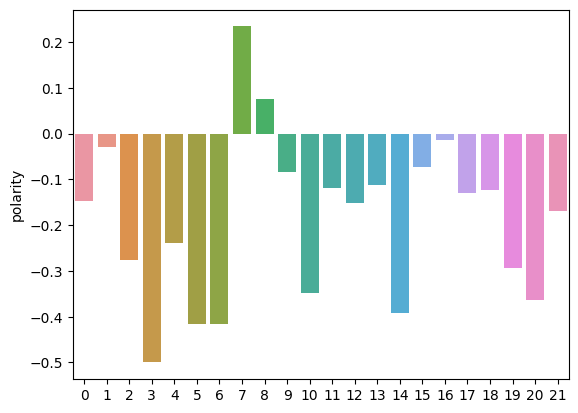

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.barplot(x=np.asarray(range(0, len(df))), y='polarity', data=df)
plt.show()

In [129]:
with open('/content/sentences.TXT', 'w') as f:
  for sentence in df['sentence']:
    f.write(sentence)
    f.write('\n')